In [1]:
import numpy as np
import cvxopt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [2]:
class SVM:
    def fit(self, X, y):
        n_samples, n_features = X.shape
# P = X^T X
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = np.dot(X[i], X[j])
        P = cvxopt.matrix(np.outer(y, y) * K)
        # q = -1 (1xN)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        # A = y^T 
        A = cvxopt.matrix(y, (1, n_samples))
        # b = 0 
        b = cvxopt.matrix(0.0)
        # -1 (NxN)
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
        # 0 (1xN)
        h = cvxopt.matrix(np.zeros(n_samples))
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        # Lagrange multipliers
        a = np.ravel(solution['x'])
        # Lagrange have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
        self.b /= len(self.a)
        # Weights
        self.w = np.zeros(n_features)
        for n in range(len(self.a)):
            self.w += self.a[n] * self.sv_y[n] * self.sv[n]

    def project(self, X):
        return np.dot(X, self.w) + self.b


    def predict(self, X):
        return np.sign(self.project(X))

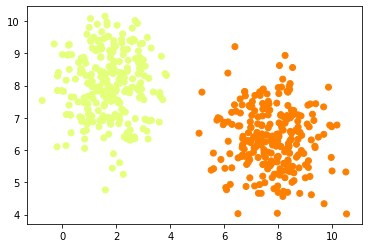

In [3]:
X, y = make_blobs(n_samples=500, centers=2, n_features=2, shuffle=True, random_state=20)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Wistia');

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
svm = SVM()
svm.fit(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -3.3931e+01 -6.5205e+01  1e+03  4e+01  2e+00
 1: -4.1299e+01 -3.2402e+01  6e+02  1e+01  8e-01
 2: -7.8628e+01 -4.6586e+01  5e+02  1e+01  6e-01
 3: -7.1704e+01 -1.6248e+01  2e+02  4e+00  2e-01
 4: -8.8132e+00 -1.4717e+00  2e+01  4e-01  2e-02
 5: -1.0911e+00 -1.2297e+00  1e+00  2e-02  9e-04
 6: -1.0197e+00 -1.0473e+00  8e-02  7e-04  4e-05
 7: -1.0388e+00 -1.0418e+00  8e-03  7e-05  4e-06
 8: -1.0409e+00 -1.0412e+00  5e-04  1e-06  6e-08
 9: -1.0412e+00 -1.0412e+00  5e-06  1e-08  6e-10
10: -1.0412e+00 -1.0412e+00  5e-08  1e-10  6e-12
Optimal solution found.


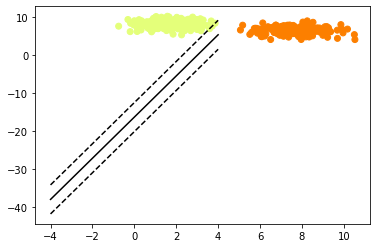

In [6]:
def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Wistia')
# w.x + b = 0
a0 = -4; a1 = f(a0, svm.w, svm.b)
b0 = 4; b1 = f(b0, svm.w, svm.b)
plt.plot([a0,b0], [a1,b1], 'k');
# w.x + b = 1
a0 = -4; a1 = f(a0, svm.w, svm.b, 1)
b0 = 4; b1 = f(b0, svm.w, svm.b, 1)
plt.plot([a0,b0], [a1,b1], 'k--');
# w.x + b = -1
a0 = -4; a1 = f(a0, svm.w, svm.b, -1)
b0 = 4; b1 = f(b0, svm.w, svm.b, -1)
plt.plot([a0,b0], [a1,b1], 'k--');

In [7]:
y_pred = svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[54,  0],
       [ 0, 71]], dtype=int64)

In [8]:
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC()

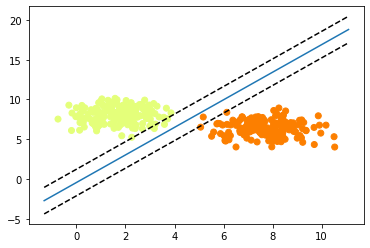

In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Wistia');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy);
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--');
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--');